In [1]:
PATH = "/media/maxine/c8f4bcb2-c1fe-4676-877d-8e476418f5e5/0-RPE-cell-timelapse/"
from modules.learning.models import *
from modules.learning.train import train_model
from modules.utils import hc
from modules.visualize import plot_loss, plot_normalized_time_error

# from modules.learning.evaluate import Evaluation, get_latent_space, plot_umap
from matplotlib import pyplot as plt
from modules.learning.dycep import DYCEP
import json

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# enet = EfficientNet()


track_path = PATH + "track_datasets/control_mm/train/images/"
label_path = PATH + "track_datasets/control_mm/train/labels/"

in_channels = [1]

# training mamba model

In [ ]:
model = DYCEP(cnn_in_channels=len(in_channels))
model.to(DEVICE)

#########
# test on one track
#########

track_name = "0607.1629.npy"
# getting one sequence to check the model
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, in_channels, :, :]


label = torch.tensor(
    np.load(label_path + track_name).reshape(2, -1).T,
    dtype=torch.float32,
)

imgs, label = imgs.to(DEVICE), label.to(DEVICE)

zz = model.forward(imgs[None, :, :, :])
zz = zz.detach().cpu().numpy().squeeze()
plt.plot(zz)
print("min max")
print(zz.min(0), zz.max(0))
print(hc(model), "Parameters")

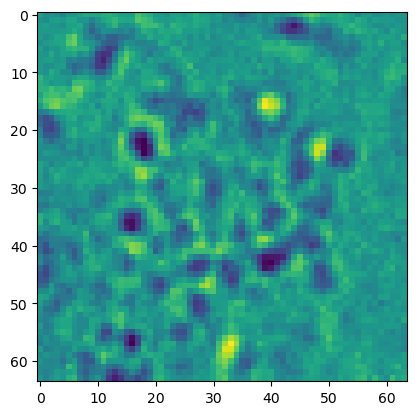

In [3]:
imgs.shape
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, :, :, :]

plt.imshow(imgs[10, 1, :, :].detach().cpu().numpy())

In [4]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=in_channels,
    batch_size=1,
    learning_rate=1e-5,
    slice_p=0.5,
    slice_len=20,
    random_len=True,
    name="DYCEP",
    num_epochs=20,
)

Epoch 1/20


  0%|          | 1/5188 [00:00<30:53,  2.80it/s]

anormal span detected
tensor([-0.0349], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5263, 0.4915]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0338], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5262, 0.4924]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 6/5188 [00:00<07:56, 10.87it/s]

anormal span detected
tensor([-0.0328], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5256, 0.4928]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0317], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5249, 0.4932]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0308], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5243, 0.4935]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0299], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5237, 0.4938]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 10/5188 [00:00<05:44, 15.02it/s]

anormal span detected
tensor([-0.0289], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5229, 0.4941]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0280], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5223, 0.4943]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0270], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5217, 0.4947]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0260], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5211, 0.4950]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 14/5188 [00:01<05:03, 17.04it/s]

anormal span detected
tensor([-0.0250], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5205, 0.4955]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0239], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5199, 0.4959]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0228], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5193, 0.4965]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0217], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5188, 0.4971]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 18/5188 [00:01<04:42, 18.31it/s]

anormal span detected
tensor([-0.0205], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5183, 0.4977]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0195], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5178, 0.4983]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0183], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5174, 0.4991]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0174], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5171, 0.4997]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 22/5188 [00:01<04:32, 18.95it/s]

anormal span detected
tensor([-0.0164], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5168, 0.5004]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0152], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5163, 0.5010]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0144], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5159, 0.5015]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0133], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5156, 0.5023]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  0%|          | 24/5188 [00:01<04:30, 19.10it/s]

anormal span detected
tensor([-0.0129], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5155, 0.5026]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0116], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5152, 0.5037]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0112], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5153, 0.5041]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0099], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5151, 0.5052]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0091], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5151, 0.5060]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  1%|          | 30/5188 [00:01<04:19, 19.90it/s]

anormal span detected
tensor([-0.0082], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5150, 0.5068]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0075], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5150, 0.5075]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0064], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5148, 0.5084]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0055], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5146, 0.5091]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  1%|          | 34/5188 [00:02<04:23, 19.59it/s]

anormal span detected
tensor([-0.0045], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5144, 0.5099]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0035], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5141, 0.5106]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0024], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5139, 0.5115]], device='cuda:0', grad_fn=<SqueezeBackward1>)
anormal span detected
tensor([-0.0013], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5136, 0.5123]], device='cuda:0', grad_fn=<SqueezeBackward1>)


  1%|          | 39/5188 [00:02<04:14, 20.22it/s]

anormal span detected
tensor([-0.0004], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.5133, 0.5130]], device='cuda:0', grad_fn=<SqueezeBackward1>)


100%|██████████| 358/358 [00:04<00:00, 71.64it/s]


    Train Loss: 0.064, Test Loss: 0.058
    Train R2: 0.536, Test R2: 0.683
Epoch 2/20


100%|██████████| 358/358 [00:05<00:00, 69.33it/s]


    Train Loss: 0.058, Test Loss: 0.056
    Train R2: 0.697, Test R2: 0.709
Epoch 3/20


100%|██████████| 358/358 [00:04<00:00, 74.28it/s]


    Train Loss: 0.054, Test Loss: 0.067
    Train R2: 0.717, Test R2: 0.724
Epoch 4/20


100%|██████████| 358/358 [00:04<00:00, 74.53it/s]


    Train Loss: 0.055, Test Loss: 0.066
    Train R2: 0.727, Test R2: 0.730
Epoch 5/20


100%|██████████| 358/358 [00:04<00:00, 73.18it/s]


    Train Loss: 0.054, Test Loss: 0.061
    Train R2: 0.733, Test R2: 0.734
Epoch 6/20


100%|██████████| 358/358 [00:04<00:00, 74.00it/s]


    Train Loss: 0.054, Test Loss: 0.057
    Train R2: 0.736, Test R2: 0.737
Epoch 7/20


100%|██████████| 358/358 [00:04<00:00, 72.84it/s]


    Train Loss: 0.054, Test Loss: 0.062
    Train R2: 0.738, Test R2: 0.739
Epoch 8/20


100%|██████████| 358/358 [00:04<00:00, 74.08it/s]


    Train Loss: 0.054, Test Loss: 0.060
    Train R2: 0.740, Test R2: 0.741
Epoch 9/20


100%|██████████| 358/358 [00:04<00:00, 73.11it/s]


    Train Loss: 0.054, Test Loss: 0.062
    Train R2: 0.742, Test R2: 0.743
Epoch 10/20


100%|██████████| 358/358 [00:04<00:00, 74.49it/s]


    Train Loss: 0.054, Test Loss: 0.063
    Train R2: 0.743, Test R2: 0.744
Epoch 11/20


100%|██████████| 358/358 [00:04<00:00, 73.51it/s]


    Train Loss: 0.053, Test Loss: 0.062
    Train R2: 0.744, Test R2: 0.745
Epoch 12/20


100%|██████████| 358/358 [00:04<00:00, 73.42it/s]


    Train Loss: 0.055, Test Loss: 0.061
    Train R2: 0.745, Test R2: 0.746
Epoch 13/20


100%|██████████| 358/358 [00:04<00:00, 74.38it/s]


    Train Loss: 0.054, Test Loss: 0.064
    Train R2: 0.746, Test R2: 0.746
Epoch 14/20


100%|██████████| 358/358 [00:04<00:00, 73.28it/s]


    Train Loss: 0.053, Test Loss: 0.059
    Train R2: 0.747, Test R2: 0.747
Epoch 15/20


100%|██████████| 358/358 [00:04<00:00, 72.74it/s]


    Train Loss: 0.053, Test Loss: 0.054
    Train R2: 0.747, Test R2: 0.748
Epoch 16/20


100%|██████████| 358/358 [00:04<00:00, 74.05it/s]


    Train Loss: 0.053, Test Loss: 0.066
    Train R2: 0.748, Test R2: 0.748
Epoch 17/20


100%|██████████| 358/358 [00:04<00:00, 72.48it/s]


    Train Loss: 0.051, Test Loss: 0.068
    Train R2: 0.748, Test R2: 0.749
Epoch 18/20


100%|██████████| 358/358 [00:04<00:00, 74.67it/s]


    Train Loss: 0.052, Test Loss: 0.052
    Train R2: 0.749, Test R2: 0.750
Epoch 19/20


 25%|██▌       | 1316/5188 [00:48<02:16, 28.27it/s]

anormal span detected
tensor([-0.0023], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7022, 0.6999]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 32%|███▏      | 1657/5188 [01:00<02:01, 29.11it/s]

anormal span detected
tensor([-0.0099], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.6880, 0.6782]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 34%|███▍      | 1757/5188 [01:04<01:59, 28.62it/s]

anormal span detected
tensor([-0.0517], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7480, 0.6963]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 34%|███▍      | 1767/5188 [01:04<01:57, 29.06it/s]

anormal span detected
tensor([-0.0264], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7134, 0.6870]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 53%|█████▎    | 2735/5188 [01:39<01:26, 28.31it/s]

anormal span detected
tensor([-0.0206], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7066, 0.6860]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 59%|█████▉    | 3083/5188 [01:52<01:18, 26.84it/s]

anormal span detected
tensor([-0.0336], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7172, 0.6836]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 67%|██████▋   | 3462/5188 [02:06<01:01, 28.12it/s]

anormal span detected
tensor([-0.0120], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7146, 0.7026]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 89%|████████▉ | 4627/5188 [02:49<00:20, 27.58it/s]

anormal span detected
tensor([-0.0320], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.6875, 0.6555]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 89%|████████▉ | 4633/5188 [02:49<00:19, 27.97it/s]

anormal span detected
tensor([-0.0163], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.6702, 0.6539]], device='cuda:0', grad_fn=<SqueezeBackward1>)


100%|██████████| 358/358 [00:05<00:00, 71.24it/s]


    Train Loss: 0.049, Test Loss: 0.049
    Train R2: 0.750, Test R2: 0.751
Epoch 20/20


 25%|██▌       | 1311/5188 [00:47<02:20, 27.68it/s]

anormal span detected
tensor([-0.0184], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.6819, 0.6636]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 37%|███▋      | 1924/5188 [01:10<02:00, 27.19it/s]

anormal span detected
tensor([-0.0221], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7290, 0.7069]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 44%|████▍     | 2287/5188 [01:23<01:47, 27.03it/s]

anormal span detected
tensor([-0.0254], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7154, 0.6900]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 58%|█████▊    | 2996/5188 [01:49<01:17, 28.28it/s]

anormal span detected
tensor([-0.0238], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7161, 0.6924]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 61%|██████    | 3164/5188 [01:55<01:08, 29.40it/s]

anormal span detected
tensor([-0.0370], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7321, 0.6950]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 74%|███████▍  | 3845/5188 [02:20<00:49, 27.16it/s]

anormal span detected
tensor([-0.0390], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7779, 0.7389]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 86%|████████▌ | 4467/5188 [02:43<00:26, 27.32it/s]

anormal span detected
tensor([-0.0271], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7283, 0.7012]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 88%|████████▊ | 4549/5188 [02:46<00:21, 29.26it/s]

anormal span detected
tensor([-0.0035], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7122, 0.7087]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 88%|████████▊ | 4558/5188 [02:46<00:23, 26.81it/s]

anormal span detected
tensor([-0.0014], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.6874, 0.6860]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 90%|█████████ | 4679/5188 [02:51<00:17, 28.36it/s]

anormal span detected
tensor([-0.0249], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7092, 0.6842]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 97%|█████████▋| 5052/5188 [03:05<00:04, 27.21it/s]

anormal span detected
tensor([-0.0422], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7430, 0.7008]], device='cuda:0', grad_fn=<SqueezeBackward1>)


 98%|█████████▊| 5059/5188 [03:05<00:04, 28.99it/s]

anormal span detected
tensor([-0.0228], device='cuda:0', grad_fn=<SubBackward0>)
tensor([[0.7272, 0.7044]], device='cuda:0', grad_fn=<SqueezeBackward1>)


100%|██████████| 358/358 [00:04<00:00, 72.42it/s]


    Train Loss: 0.049, Test Loss: 0.055
    Train R2: 0.751, Test R2: 0.752


'Done!'

# Example to swap temporal encoders

In [2]:
from modules.learning.time_encoders.transformer import SmallTransformerEncoder
from torch import nn

in_channels = [1]

temporal_encoder_dim = 256
temporal_encoder_n_layers = 6

transformer_temporal_encoder = nn.TransformerEncoder(
    nn.TransformerEncoderLayer(
        d_model=temporal_encoder_dim, nhead=8, dim_feedforward=temporal_encoder_dim * 2, batch_first=True
    ),
    num_layers=temporal_encoder_n_layers,
)
transformer_temporal_encoder = SmallTransformerEncoder(
    d_model=temporal_encoder_dim, num_layers=temporal_encoder_n_layers
)

lstm_temporal_encoder = (
    nn.LSTM(temporal_encoder_dim, temporal_encoder_dim, num_layers=6, batch_first=True),
)


In [3]:
model = DYCEP(
    cnn_in_channels=len(in_channels),
    mamba_z_dim=temporal_encoder_dim,
    mamba_n_layers=temporal_encoder_n_layers,
)
model_transformer = DYCEP(
    cnn_in_channels=len(in_channels), temporal_encoder=transformer_temporal_encoder
)
model_lstm = DYCEP(
    cnn_in_channels=len(in_channels), temporal_encoder=lstm_temporal_encoder
)

In [4]:
from modules.utils import hc

print(f"transformer model has {hc(model_transformer)} parameters")
print(f"lstm model has {hc(model_lstm)} parameters")
print(f"mamba model has {hc(model)} parameters")

transformer model has 5.41M parameters
lstm model has 669.99K parameters
mamba model has 3.30M parameters


In [5]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model_transformer,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=in_channels,
    batch_size=1,
    learning_rate=1e-5,
    slice_p=0.,
    slice_len=20,
    random_len=True,
    name="DYCEP",
    num_epochs=5,
)

Epoch 1/5


  0%|          | 0/5188 [00:00<?, ?it/s]

# Go to result_dycep notebook